In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import random
import matplotlib.pyplot as plt

class CoinTossGame:
    def __init__(self, prob_heads=0.5, payout_heads=2, payout_tails=1):
        self.prob_heads = prob_heads
        self.payout_heads = payout_heads
        self.payout_tails = payout_tails

    def toss_coin(self):
        return 'heads' if random.random() < self.prob_heads else 'tails'

    def play_round(self, bet_amount):
        outcome = self.toss_coin()
        if outcome == 'heads':
            return bet_amount * self.payout_heads
        else:
            return bet_amount * self.payout_tails

class BettingStrategy:
    def __init__(self, initial_balance, bet_percentage=0.05):
        self.balance = initial_balance
        self.bet_percentage = bet_percentage

    def place_bet(self):
        bet_amount = self.balance * self.bet_percentage
        return bet_amount

    def update_balance(self, payout):
        self.balance += payout - self.place_bet()

class KellyCriterionStrategy:
    def __init__(self, initial_balance, prob_heads, payout_heads, payout_tails):
        self.balance = initial_balance
        self.prob_heads = prob_heads
        self.payout_heads = payout_heads
        self.payout_tails = payout_tails
        self.kelly_fraction = self.calculate_kelly_fraction()

    def calculate_kelly_fraction(self):
        b = self.payout_heads
        p = self.prob_heads
        q = 1 - p
        self.kelly_fraction = p -(q/b)
        return self.kelly_fraction

    def place_bet(self):
        kelly_fraction = self.calculate_kelly_fraction()
        bet_amount = self.balance * kelly_fraction
        return bet_amount

    def update_balance(self, payout):
        self.balance += payout - self.place_bet()

def run_simulation(strategy, initial_balance, num_rounds, prob_heads, payout_heads, payout_tails, bet_percentage, num_simulations):
    results = []
    for _ in range(num_simulations):
        strategy.balance = initial_balance
        game = CoinTossGame(prob_heads=prob_heads, payout_heads=payout_heads, payout_tails=payout_tails)
        # strategy = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
        balances = [strategy.balance]
        for _ in range(num_rounds):
            bet_amount = strategy.place_bet()
            payout = game.play_round(bet_amount)
            strategy.update_balance(payout)
            balances.append(strategy.balance)
        results.append(balances)
    return results

def plot_simulation_results(results):
    for result in results:
        plt.plot(result)
    plt.xlabel('Round')
    plt.ylabel('Balance')
    plt.title('Coin Toss Game Simulations')
    plt.show()

def get_simulation_statistics(simulation_results):
  final_results = [result[-1] for result in simulation_results]
  mean = round(np.mean(final_results),2)
  median = round(np.median(final_results),2)
  min = round(np.min(final_results),2)
  max = round(np.max(final_results),2)
  print("Mean:", mean, "Median:", median, "Min:", min, "Max:", max)

def calculate_expected_value(prob_heads, payout_heads, payout_tails, bet_amount):
    """
    Calculate the expected value of one coin toss game.

    :param prob_heads: Probability of getting heads
    :param payout_heads: Payout for heads
    :param payout_tails: Payout for tails
    :param bet_amount: Amount bet on the game
    :return: Expected value of the game
    """
    prob_tails = 1 - prob_heads
    expected_value = (prob_heads * (bet_amount * payout_heads)) + (prob_tails * (bet_amount * payout_tails))
    return expected_value


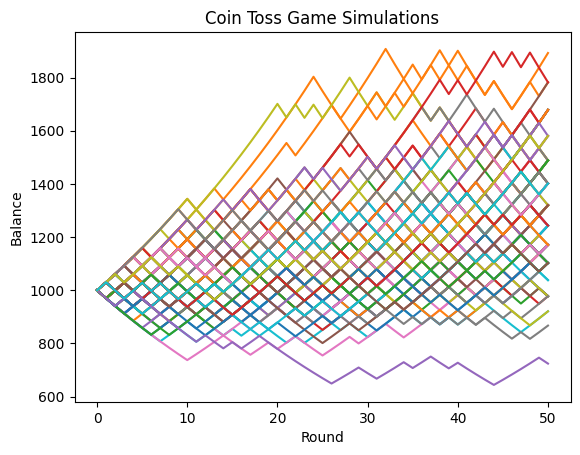

Mean: 1309.61 Median: 1319.93 Min: 724.26 Max: 1892.1


In [ ]:
# Game 1
game_1 = {
    "prob_heads": 0.6,
    "payout_heads": 1.03,
    "payout_tails": 0.97,
}
# Simulation settings
initial_balance = 1000
num_rounds = 50
bet_percentage = 1
num_simulations = 100

# Create strategy
strategy = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
# Run simulations
simulation_results = run_simulation(strategy, initial_balance, num_rounds,
                                    game_1["prob_heads"], game_1["payout_heads"], game_1["payout_tails"],
                                    bet_percentage, num_simulations)
# Plot results
plot_simulation_results(simulation_results)
get_simulation_statistics(simulation_results)

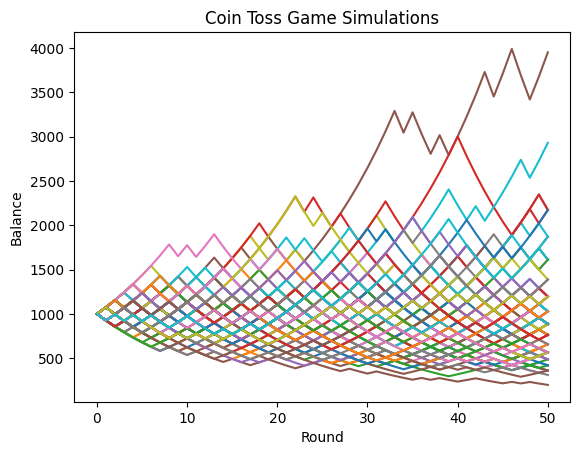

Mean: 990.34 Median: 886.25 Min: 198.8 Max: 3950.95


In [ ]:
# Game 2
game_2 = {
    "prob_heads": 0.5,
    "payout_heads": 2,
    "payout_tails": 0.01,
}

# Simulation settings
initial_balance = 1000
num_rounds = 50
bet_percentage = 0.075
num_simulations = 100

# Create strategy
strategy = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
# Run simulations
simulation_results = run_simulation(strategy, initial_balance, num_rounds,
                                    game_2["prob_heads"], game_2["payout_heads"], game_2["payout_tails"],
                                    bet_percentage, num_simulations)
# Plot results
plot_simulation_results(simulation_results)
get_simulation_statistics(simulation_results)

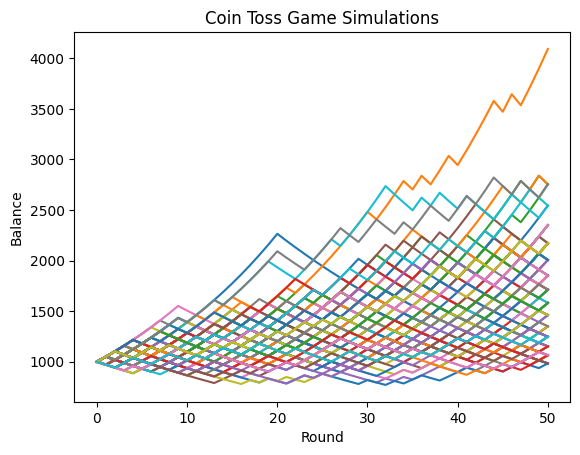

Mean: 1677.41 Median: 1581.34 Min: 982.93 Max: 4092.95


In [ ]:
# Game 3
game_3 = {
    "prob_heads": 0.5,
    "payout_heads": 1.03,
    "payout_tails": 0.95,
}

# Simulation settings
initial_balance = 1000
num_rounds = 50
bet_percentage = -1
num_simulations = 100

# Create strategy
strategy = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
# Run simulations
simulation_results = run_simulation(strategy, initial_balance, num_rounds,
                                    game_3["prob_heads"], game_3["payout_heads"], game_3["payout_tails"],
                                    bet_percentage, num_simulations)
# Plot results
plot_simulation_results(simulation_results)
get_simulation_statistics(simulation_results)

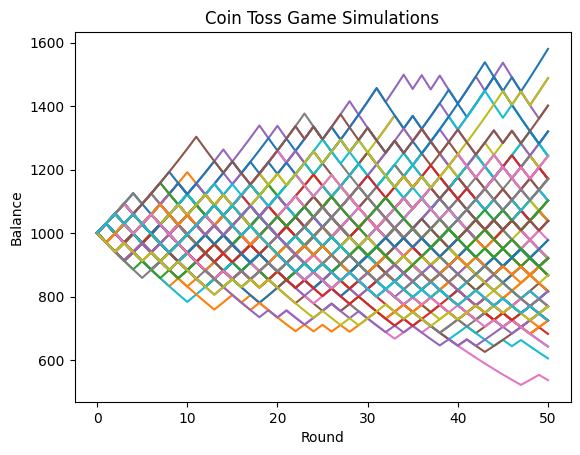

Mean: 971.86 Median: 920.79 Min: 536.5 Max: 1580.33


In [ ]:
# Game 4
game_4 = {
    "prob_heads": 0.5,
    "payout_heads": 1.03,
    "payout_tails": 0.97,
}

# Simulation settings
initial_balance = 1000
num_rounds = 50
bet_percentage = 1
num_simulations = 100

# Create strategy
strategy = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
# Run simulations
simulation_results = run_simulation(strategy, initial_balance, num_rounds,
                                    game_4["prob_heads"], game_4["payout_heads"], game_4["payout_tails"],
                                    bet_percentage, num_simulations)
# Plot results
plot_simulation_results(simulation_results)
get_simulation_statistics(simulation_results)

In [ ]:
# Game results
expected_value = calculate_expected_value(game_1["prob_heads"], game_1["payout_heads"], game_1["payout_tails"], 1)
print("Game 1 EV:", expected_value)
expected_value = calculate_expected_value(game_2["prob_heads"], game_2["payout_heads"], game_2["payout_tails"], 1)
print("Game 2 EV:", expected_value)
expected_value = calculate_expected_value(game_3["prob_heads"], game_3["payout_heads"], game_3["payout_tails"], 1)
print("Game 3 EV:", expected_value)
expected_value = calculate_expected_value(game_4["prob_heads"], game_4["payout_heads"], game_4["payout_tails"], 1)
print("Game 4 EV:", expected_value)

Game 1 EV: 1.006
Game 2 EV: 1.005
Game 3 EV: 0.99
Game 4 EV: 1.0


In [ ]:
num_simulations = 1000
# Create strategy
strategy1 = KellyCriterionStrategy(initial_balance=initial_balance, prob_heads=game_1["prob_heads"], payout_heads=game_1["payout_heads"], payout_tails=game_1["payout_tails"])
strategy2 = KellyCriterionStrategy(initial_balance=initial_balance, prob_heads=game_2["prob_heads"], payout_heads=game_2["payout_heads"], payout_tails=game_2["payout_tails"])
strategy3 = KellyCriterionStrategy(initial_balance=initial_balance, prob_heads=game_3["prob_heads"], payout_heads=game_3["payout_heads"], payout_tails=game_3["payout_tails"])
strategy4 = KellyCriterionStrategy(initial_balance=initial_balance, prob_heads=game_4["prob_heads"], payout_heads=game_4["payout_heads"], payout_tails=game_4["payout_tails"])
# Run simulations
simulation_results1 = run_simulation(strategy1, initial_balance, num_rounds,
                                    game_1["prob_heads"], game_1["payout_heads"], game_1["payout_tails"],
                                    strategy1.kelly_fraction, num_simulations)
simulation_results2 = run_simulation(strategy2, initial_balance, num_rounds,
                                    game_2["prob_heads"], game_2["payout_heads"], game_2["payout_tails"],
                                    strategy2.kelly_fraction, num_simulations)
simulation_results3 = run_simulation(strategy3, initial_balance, num_rounds,
                                    game_3["prob_heads"], game_3["payout_heads"], game_3["payout_tails"],
                                    strategy3.kelly_fraction, num_simulations)
simulation_results4 = run_simulation(strategy4, initial_balance, num_rounds,
                                    game_4["prob_heads"], game_4["payout_heads"], game_4["payout_tails"],
                                    strategy4.kelly_fraction, num_simulations)
print("Game 1", strategy1.kelly_fraction)
get_simulation_statistics(simulation_results1)
print("Game 2", strategy2.kelly_fraction)
get_simulation_statistics(simulation_results2)
print("Game 3", strategy3.kelly_fraction)
get_simulation_statistics(simulation_results3)
print("Game 4", strategy4.kelly_fraction)
get_simulation_statistics(simulation_results4)

Game 1 0.2116504854368932
Mean: 1064.84 Median: 1064.48 Min: 914.02 Max: 1208.62
Game 2 0.25
Mean: 1109.31 Median: 216.48 Min: 0.81 Max: 95555.36
Game 3 0.014563106796116498
Mean: 992.76 Median: 992.74 Min: 981.24 Max: 1004.37
Game 4 0.014563106796116498
Mean: 999.94 Median: 1000.0 Min: 988.7 Max: 1010.54


In [ ]:
num_simulations = 1000
bet_percentage = 0.25
# Create strategy
strategy1 = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
strategy2 = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
strategy3 = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)
strategy4 = BettingStrategy(initial_balance=initial_balance, bet_percentage=bet_percentage)

# Run simulations
simulation_results1 = run_simulation(strategy1, initial_balance, num_rounds,
                                    game_1["prob_heads"], game_1["payout_heads"], game_1["payout_tails"],
                                    bet_percentage, num_simulations)
simulation_results2 = run_simulation(strategy2, initial_balance, num_rounds,
                                    game_2["prob_heads"], game_2["payout_heads"], game_2["payout_tails"],
                                    bet_percentage, num_simulations)
simulation_results3 = run_simulation(strategy3, initial_balance, num_rounds,
                                    game_3["prob_heads"], game_3["payout_heads"], game_3["payout_tails"],
                                    bet_percentage, num_simulations)
simulation_results4 = run_simulation(strategy4, initial_balance, num_rounds,
                                    game_4["prob_heads"], game_4["payout_heads"], game_4["payout_tails"],
                                    bet_percentage, num_simulations)
print("Game 1")
get_simulation_statistics(simulation_results1)
print("Game 2")
get_simulation_statistics(simulation_results2)
print("Game 3")
get_simulation_statistics(simulation_results3)
print("Game 4")
get_simulation_statistics(simulation_results4)

Game 1
Mean: 1080.83 Median: 1076.37 Min: 912.65 Max: 1250.57
Game 2
Mean: 1224.3 Median: 216.48 Min: 0.49 Max: 57524.32
Game 3
Mean: 885.33 Median: 880.14 Min: 720.24 Max: 1075.56
Game 4
Mean: 1002.01 Median: 998.59 Min: 859.5 Max: 1195.54
